<a href="https://colab.research.google.com/github/swarna32/kidney_failure/blob/main/kidney_failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/nnfl/kidney_disease.csv')

In [ ]:
dataset

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [ ]:
mask = dataset.applymap(lambda x: x == '\t?')

# Get list of columns with '\t?' string
cols_with_missing = mask.any()

# Print columns with '\t?' string
print(cols_with_missing[cols_with_missing == True])

pcv    True
wc     True
rc     True
dtype: bool


In [ ]:
dataset['pcv'] = dataset['pcv'].replace('\t?', pd.NaT)
dataset['wc'] = dataset['wc'].replace('\t?', pd.NaT)
dataset['rc'] = dataset['rc'].replace('\t?', pd.NaT)
# dataset['classification'] = dataset['classification'].replace('\t?', 0)
dataset.fillna(dataset.mean(), inplace=True)

dataset.fillna(0, inplace=True)
dataset.to_csv('updated_dataset.csv', index=False)

<ipython-input-203-d0be11379116>:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.fillna(dataset.mean(), inplace=True)


In [ ]:
dataset

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,0,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,0,normal,notpresent,notpresent,...,38,6000,0,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,0,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [ ]:
from sklearn.preprocessing import LabelEncoder
cat_cols = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane','classification']

# Use LabelEncoder to convert the categorical variables to numerical variables
label_encoder = LabelEncoder()

for col in cat_cols:
    dataset[col] = label_encoder.fit_transform(dataset[col].astype(str))

# Print the preprocessed dataset
print(dataset.head())

   id   age    bp     sg   al   su  rbc  pc  pcc  ba  ...  pcv    wc   rc  \
0   0  48.0  80.0  1.020  1.0  0.0    0   2    1   1  ...   44  7800  5.2   
1   1   7.0  50.0  1.020  4.0  0.0    0   2    1   1  ...   38  6000    0   
2   2  62.0  80.0  1.010  2.0  3.0    2   2    1   1  ...   31  7500    0   
3   3  48.0  70.0  1.005  4.0  0.0    2   1    2   1  ...   32  6700  3.9   
4   4  51.0  80.0  1.010  2.0  0.0    2   2    1   1  ...   35  7300  4.6   

   htn  dm  cad appet pe ane  classification  
0    2   5    2     1  1   1               0  
1    1   4    2     1  1   1               0  
2    1   5    2     2  1   2               0  
3    2   4    2     2  2   2               0  
4    1   4    2     1  1   1               0  

[5 rows x 26 columns]


In [ ]:
X = dataset.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]]
y = dataset.iloc[:,25].values


In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(X)

In [ ]:
X

array([[0.        , 0.52272727, 0.23076923, ..., 0.5       , 0.5       ,
        0.5       ],
       [0.00250627, 0.05681818, 0.        , ..., 0.5       , 0.5       ,
        0.5       ],
       [0.00501253, 0.68181818, 0.23076923, ..., 1.        , 0.5       ,
        1.        ],
       ...,
       [0.99498747, 0.11363636, 0.23076923, ..., 0.5       , 0.5       ,
        0.5       ],
       [0.99749373, 0.17045455, 0.07692308, ..., 0.5       , 0.5       ,
        0.5       ],
       [1.        , 0.63636364, 0.23076923, ..., 0.5       , 0.5       ,
        0.5       ]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [ ]:
X.shape

(400, 25)

In [ ]:
X_test.shape

(80, 25)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(60, input_dim=25, activation='relu'))
model.add(Dense(40, activation='relu'))
# model.add(Dense(5, activation='relu'))

model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_74 (Dense)            (None, 60)                1560      
                                                                 
 dense_75 (Dense)            (None, 40)                2440      
                                                                 
 dense_76 (Dense)            (None, 1)                 41        
                                                                 
Total params: 4,041
Trainable params: 4,041
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train,y_train,epochs=100, batch_size=40)

Epoch 1/100
8/8 [==============================] - 1s 3ms/step - loss: 0.5875 - accuracy: 0.0906
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 0.3551 - accuracy: 0.0063
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 0.1707 - accuracy: 0.0063
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: -0.0473 - accuracy: 0.0156
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: -0.2714 - accuracy: 0.0781
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: -0.5645 - accuracy: 0.1656
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: -0.9365 - accuracy: 0.2125
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: -1.4067 - accuracy: 0.2656
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: -1.9812 - accuracy: 0.3250
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: -2.6348 - accuracy: 0.2906
Epoch 11/100
8/8 [====

In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']

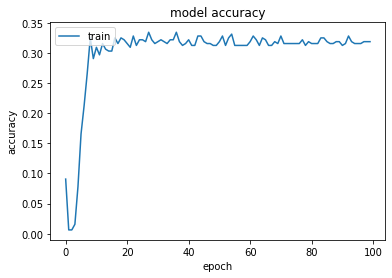

<Figure size 432x288 with 0 Axes>

In [ ]:
from matplotlib import pyplot as plt
#plot training and validation accuracy
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
plt.savefig('accuracy_curve.png')

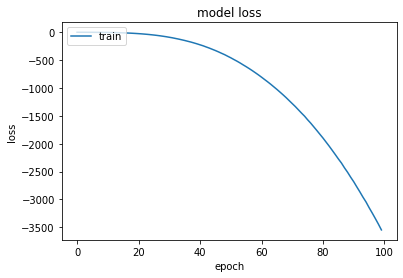

<Figure size 432x288 with 0 Axes>

In [ ]:
#plot training loss
plt.plot(history.history['loss'])
plt.plot()
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
plt.savefig('loss_curve.png')

In [ ]:
history_test = model.evaluate(X_test,y_test)

3/3 [==============================] - 0s 5ms/step - loss: -3309.0188 - accuracy: 0.3875


In [ ]:
history_test

[-3309.018798828125, 0.38749998807907104]

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))
pred_knn= knn.predict(X_test)
print(classification_report(y_test, pred_knn))

0.9875
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           2       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, pred_knn)
ac = accuracy_score(y_test,pred_knn)

In [ ]:
print(cm)
print(ac)

[[51  1]
 [ 0 28]]
0.9875


In [ ]:
dataset2= pd.read_csv('/content/drive/MyDrive/nnfl/kidney_disease.csv')

In [ ]:
mask = dataset2.applymap(lambda x: x == '\t?')

# Get list of columns with '\t?' string
cols_with_missing = mask.any()

# Print columns with '\t?' string
print(cols_with_missing[cols_with_missing == True])

pcv    True
wc     True
rc     True
dtype: bool


In [ ]:
dataset2['pcv'] = dataset2['pcv'].replace('\t?', 0)
dataset2['wc'] = dataset2['wc'].replace('\t?', 0)
dataset2['rc'] = dataset2['rc'].replace('\t?', 0)
dataset['classification'] = dataset['classification'].replace('\t?',0)
dataset2.fillna(dataset2.mean(), inplace=True)

dataset2.fillna(0, inplace=True)
dataset2.to_csv('updated_dataset.csv', index=False)

<ipython-input-312-c0f55989299f>:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset2.fillna(dataset2.mean(), inplace=True)


In [ ]:
dataset2

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,0,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,0,normal,notpresent,notpresent,...,38,6000,0,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,0,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [ ]:
from sklearn.preprocessing import LabelEncoder
cat_cols = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane','classification']

# Use LabelEncoder to convert the categorical variables to numerical variables
label_encoder = LabelEncoder()

for col in cat_cols:
    dataset2[col] = label_encoder.fit_transform(dataset2[col].astype(str))

# Print the preprocessed dataset
print(dataset2.head())

   id   age    bp     sg   al   su  rbc  pc  pcc  ba  ...  pcv    wc   rc  \
0   0  48.0  80.0  1.020  1.0  0.0    0   2    1   1  ...   44  7800  5.2   
1   1   7.0  50.0  1.020  4.0  0.0    0   2    1   1  ...   38  6000    0   
2   2  62.0  80.0  1.010  2.0  3.0    2   2    1   1  ...   31  7500    0   
3   3  48.0  70.0  1.005  4.0  0.0    2   1    2   1  ...   32  6700  3.9   
4   4  51.0  80.0  1.010  2.0  0.0    2   2    1   1  ...   35  7300  4.6   

   htn  dm  cad appet pe ane  classification  
0    2   5    2     1  1   1               0  
1    1   4    2     1  1   1               0  
2    1   5    2     2  1   2               0  
3    2   4    2     2  2   2               0  
4    1   4    2     1  1   1               0  

[5 rows x 26 columns]


In [ ]:
dataset2_encoded = pd.get_dummies(dataset2, columns=['classification'])
dataset2 = pd.concat([dataset2, dataset2_encoded], axis=1)
dataset2.drop(['classification'], axis=1, inplace=True)
dataset2

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,rc,htn,dm,cad,appet,pe,ane,classification_0,classification_1,classification_2
0,0,48.0,80.0,1.020,1.0,0.0,0,2,1,1,...,5.2,2,5,2,1,1,1,1,0,0
1,1,7.0,50.0,1.020,4.0,0.0,0,2,1,1,...,0,1,4,2,1,1,1,1,0,0
2,2,62.0,80.0,1.010,2.0,3.0,2,2,1,1,...,0,1,5,2,2,1,2,1,0,0
3,3,48.0,70.0,1.005,4.0,0.0,2,1,2,1,...,3.9,2,4,2,2,2,2,1,0,0
4,4,51.0,80.0,1.010,2.0,0.0,2,2,1,1,...,4.6,1,4,2,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,2,2,1,1,...,4.9,1,4,2,1,1,1,0,0,1
396,396,42.0,70.0,1.025,0.0,0.0,2,2,1,1,...,6.2,1,4,2,1,1,1,0,0,1
397,397,12.0,80.0,1.020,0.0,0.0,2,2,1,1,...,5.4,1,4,2,1,1,1,0,0,1
398,398,17.0,60.0,1.025,0.0,0.0,2,2,1,1,...,5.9,1,4,2,1,1,1,0,0,1


In [ ]:
X = dataset2.iloc[:,0:50 ].values
y = dataset2.iloc[:,[50,51]].values


In [ ]:
y

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1,

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(X)

In [ ]:
X

array([[0.        , 0.52272727, 0.23076923, ..., 0.5       , 0.5       ,
        0.5       ],
       [0.00250627, 0.05681818, 0.        , ..., 0.5       , 0.5       ,
        0.5       ],
       [0.00501253, 0.68181818, 0.23076923, ..., 1.        , 0.5       ,
        1.        ],
       ...,
       [0.99498747, 0.11363636, 0.23076923, ..., 0.5       , 0.5       ,
        0.5       ],
       [0.99749373, 0.17045455, 0.07692308, ..., 0.5       , 0.5       ,
        0.5       ],
       [1.        , 0.63636364, 0.23076923, ..., 0.5       , 0.5       ,
        0.5       ]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [ ]:
X.shape

(400, 50)

In [ ]:
X_test.shape

(80, 50)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# define the keras model
model2 = Sequential()
model2.add(Dense(60, input_dim=50, activation='relu'))
model2.add(Dense(40,activation='relu'))
model2.add(Dense(2, activation='softmax'))
# compile the keras model
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model2.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_77 (Dense)            (None, 60)                3060      
                                                                 
 dense_78 (Dense)            (None, 40)                2440      
                                                                 
 dense_79 (Dense)            (None, 2)                 82        
                                                                 
Total params: 5,582
Trainable params: 5,582
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history2 = model2.fit(X_train,y_train,epochs=100, batch_size=40)

Epoch 1/100
8/8 [==============================] - 3s 9ms/step - loss: 0.3616 - accuracy: 0.8938
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 0.2309 - accuracy: 0.9937
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 0.1544 - accuracy: 0.9937
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 0.1049 - accuracy: 0.9937
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0790 - accuracy: 0.9937
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0632 - accuracy: 0.9937
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 0.0557 - accuracy: 0.9937
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0515 - accuracy: 0.9937
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0492 - accuracy: 0.9937
Epoch 10/100
8/8 [==============================] - 0s 4ms/step - loss: 0.0485 - accuracy: 0.9937
Epoch 11/100
8/8 [===========

In [ ]:
acc = history2.history['accuracy']
loss = history2.history['loss']

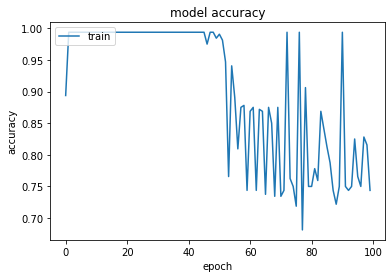

<Figure size 432x288 with 0 Axes>

In [ ]:
from matplotlib import pyplot as plt
#plot training and validation accuracy
plt.plot(history2.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
plt.savefig('accuracy_curve.png')

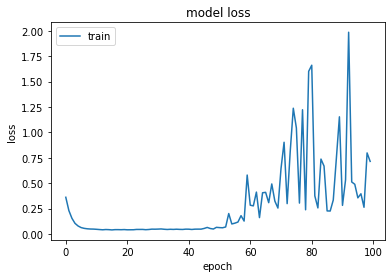

<Figure size 432x288 with 0 Axes>

In [ ]:
#plot training loss
plt.plot(history2.history['loss'])
plt.plot()
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
plt.savefig('loss_curve.png')

In [ ]:
history_test2= model2.evaluate(X_test,y_test)

3/3 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - accuracy: 1.0000


In [ ]:
history_test2

[0.0, 1.0]

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))
pred_knn= knn.predict(X_test)
print(classification_report(y_test, pred_knn))

0.9875
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.00      0.00      0.00         0

   micro avg       1.00      0.98      0.99        52
   macro avg       0.50      0.49      0.50        52
weighted avg       1.00      0.98      0.99        52
 samples avg       0.64      0.64      0.64        52



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

cm = multilabel_confusion_matrix(y_test, pred_knn)
ac = accuracy_score(y_test,pred_knn)

In [ ]:
print(cm)
print(ac)

[[[28  0]
  [ 1 51]]

 [[80  0]
  [ 0  0]]]
0.9875
